In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("modified_combined_stud_and_grades_data.csv")
df = df.drop_duplicates(subset='rollno', keep="first")
df =df.reset_index()
df=df.drop(['index'],axis=1)
y=df['cpi']
df=df[['sem1_spi','sem2_spi']]
df.head()

,sem1_spi,sem2_spi
0,7.49,6.84
1,8.06,8.93
2,7.12,6.43
3,8.10,7.86
4,6.73,6.84


In [3]:
df.corr()

,sem1_spi,sem2_spi
sem1_spi,1.000000,0.876677
sem2_spi,0.876677,1.000000


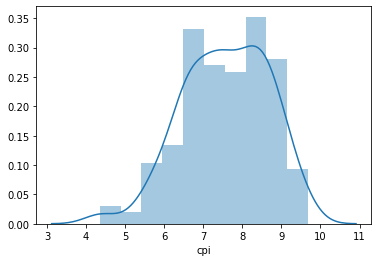

In [4]:
sns.distplot(y)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df,y,test_size=0.2)
from sklearn import linear_model
model=linear_model.LinearRegression()
for i in range(10):
    model.fit(X_train,Y_train)
    #print(i)
#     if i == 100-1:
#         print("yes")

In [6]:
model.score(X_train,Y_train)

0.8095771691900875

In [7]:
model.score(X_test,Y_test)

0.7788961028409707

In [8]:
from sklearn.externals import joblib 

# Save the model as a pickle in a file 
joblib.dump(model, 'spi1_spi2_cpi.pkl') 
knn_from_joblib = joblib.load('spi1_spi2_cpi.pkl')  
  
# Use the loaded model to make predictions 
knn_from_joblib.predict(X_test) 

X_train.head()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


,sem1_spi,sem2_spi
105,5.45,6.02
72,8.31,8.66
161,8.33,8.14
166,8.65,8.43
36,7.86,7.84


In [10]:
# Visualising the Training set results
def spi1_spi2_cpi():

    plt.scatter(df['sem2_spi'], y, color='red')
    #plt.plot(X_train['sem1_spi'], model.predict(X_train), color='blue')
    plt.title('SPI_2 vs CPI (Training set)')
    plt.xlabel('')
    plt.ylabel('ma102')
    plt.show()


# Visualising the Test set results
# plt.scatter(X_test, y_test, color='red')
# plt.plot(X_train, regressor.predict(X_train), color='blue')
# plt.title('ma101 vs ma102 (Test set)')
# plt.xlabel('ma101')
# plt.ylabel('ma102')
# plt.show()